In [1]:
from scipy.stats import ttest_ind
# loading Python modules
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# silence please; developers at work
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# append question mark ? to any method to get a jupyter popup of help
# sns.displot?

In [1]:
# sample mean and standard deviation are approximations of the population mean and std
meanA = df[df['group']=="A"]['ELV'].mean()
stdA = df[df['group']=="A"]['ELV'].std(ddof=1)
print("The sample mean and sample standard deviation for Group A are:")
meanA, stdA

NameError: name 'df' is not defined

In [ ]:
meanB = df[df['group']=="B"]['ELV'].mean()
stdB = df[df['group']=="B"]['ELV'].std()
print("The sample mean and sample standard deviation for Group B are:")
meanB, stdB

In [ ]:
# another way to get an estimate of the population parameters is to
# use the `fit` method on a probability distribution model:
from scipy.stats.distributions import norm

In [ ]:
# fit a normal distribution for Group A
norm.fit(df[df['group']=="A"]['ELV'], method="MLE")

In [ ]:
# fit a normal distribution for Group B
norm.fit(df[df['group']=="B"]['ELV'], method="MLE")

The estimates obtaind from the `fit` method are called "maximum likelyhood estimates" (MLE) meaning the computer went over all the possible parametes for the group mean $\mu$ and standard deviation $\sigma$ and picked the parameters that are most likely to have generated the data.

This is a thing now. Computers are fast enough to perform complicated search algorithms and solve optimization problems in just a few seconds to tell you the parameters $(\mu, \sigma)$ that best describe the data distribution from which the sample comes from.

In [ ]:
# the method of moments (MM) is another general-purpse way to
# compute estimates for the model parameters:
#   obtain a formula for the first moment of the distribution (set to the sample mean)
#   obtain a formula for the second moment around mean (set to value computed from sample variance)
norm.fit(df[df['group']=="S"]['ELV'], method="MM")

In [ ]:
# note there is a slight difference with the estimate obtained
# using the .std() estimator above (difference due to 1/(n-1) vs. 1/n in formulas)

In [ ]:
xS.values

In [ ]:
xbarML, sML = norm.fit(df[df['group']=="S"]['ELV'])
xAsim = norm(xbarML, sML)
sns.histplot(xAsim.rvs(300))


### Generate the LM data

$$
  \texttt{ELV} = 1000 + 2.5 \cdot \texttt{hours}
$$

In [ ]:
import numpy as np
from scipy.stats import uniform, norm
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
# np.random.seed(seed=15)
np.random.seed(seed=154)

u100 = uniform(0, 100)
x = u100.rvs(33)

n300 = norm(0, 100)
eps = n300.rvs(33)

beta1 = 2.5

y = 1000 + beta1*x + eps
y

In [ ]:
# # save generated data
# df = pd.DataFrame({'hours': x, 'ELV': y})
# with pd.ExcelWriter("data/ELV_vs_hours.ods") as writer:
#     df.to_excel(writer, sheet_name="Data", index=None)

In [ ]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x, y, ax=ax)

In [ ]:
# sm.graphics.plot_regress_exog(res, 1)

In [ ]:
# sns.scatterplot(x, res.fittedvalues)

In [ ]:
sns.lineplot(x, beta0+beta1*x, ax=ax, color="red")
fig

In [ ]:
def dmeans(data, valuescol="values", groupcol="group", groups=["A", "B"]):
    groupA, groupB = groups
    xbarA = data[data[groupcol]==groupA][valuescol].mean()
    # print("The average value in", groupA, "is", xbarA)
    xbarB = data[data[groupcol]==groupB][valuescol].mean()
    # print("The average value in", groupB, "is", xbarB)
    d = xbarA - xbarB
    return d


In [9]:
from functools import partial

def dmeans(x, col="var"):
    print(x, col)

d = partial(dmeans, col="foo")
d("hh")

d2 = partial(dmeans, "zz", col="bar")
d2()

hh foo
zz bar


In [ ]:
import scipy as sp
from scipy.stats.distributions import norm

def plot_rv(rv, label=None, xlabel=None, ax=None, title=None):
    """
    Plot a SciPy distribution (a `rv_frozen` object).
    """
    assert isinstance(rv, sp.stats._distn_infrastructure.rv_frozen), \
        'this function assumes plotting a rv_forzen random variable'
    size = 10000
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), size)
    y = rv.pdf(x)

    if ax is None:
        fig, ax = plt.subplots()
    sns.lineplot(x, y, ax=ax, label=label)
    
    ax.set_title(title)
    ax.set_xlim(x.min(), x.max())
    ax.set_xlabel(xlabel)
    ax.tick_params(axis='both', labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # return ax in case want to plot more
    return ax

rvNS = norm(loc=1000, scale=300)

plot_rv(rvNS,
        xlabel="ELV",
        label="NS",
        title='Normal distributino $\mathcal{N}(1000,100)$')


In [ ]:
size = 10000

Delta = 200
rvNS = norm(loc=1000, scale=300)
rvS = norm(loc=1000+Delta, scale=300)

x = np.linspace(rvNS.ppf(0.001), rvS.ppf(0.999), size)
yNS = rvNS.pdf(x)
yS = rvS.pdf(x)

fig, ax = plt.subplots()
sns.lineplot(x, yNS, ax=ax, label="NS") #  color='black', alpha=0.5)
sns.lineplot(x, yS, ax=ax, label="S")
ax.set_title('Normal distributions...')
# ax.set_title(ax.get_title(), pad=25)
ax.set_xlim(x.min(), x.max())
ax.set_xlabel('ELV', fontsize=8, labelpad=10)
ax.tick_params(axis='both', labelsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


### Eyeball modelling task

Let's try to guess the parameters $(\mu, \sigma)$ for the normal distribution that best describe  **Group NS** and **Group S** data samples.


In [83]:
# load dataframe we used in the first notebook
df = pd.read_csv('data/employee_lifetime_values.csv')
# df

In [86]:
# load ELV data for Group NS
data_NS = df[df["group"]=="NS"]['ELV']


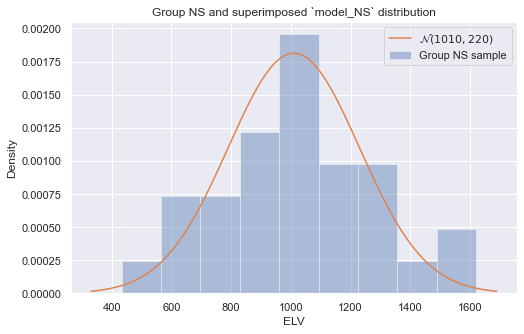

In [95]:
# plot a histogram of the data for Group NS
ax = sns.distplot(data_NS, bins=9, norm_hist=True, kde=False, label="Group NS sample")
ax.set(xlabel='ELV', ylabel='Density')

# make a guess for the probabilty model that describes data_NS
mu_NS = 1010      # 𝜇_NS (mu)
sigma_NS = 220   # 𝜎_NS (sigma)
model_NS = norm(mu_NS, sigma_NS)

# plot the model's probability density function
x = np.linspace(model_NS.ppf(0.001), model_NS.ppf(0.999), 10000)
y = model_NS.pdf(x)
ax = sns.lineplot(x, y, ax=ax, label='$\mathcal{N}('+ str(mu_NS) + ',' + str(sigma_NS) + ')$')
_ = ax.set_title('Group NS and superimposed `model_NS` distribution')

### Estimating population parameters from sample statistics

Recall the sample mean (`mean`) and sample standard deviation (`std`) descriptive statistics we computed in the previous notebook.

In [96]:
# descriptive statistics
df.groupby('group').describe()

ELV                                                                  \
      count        mean         std     min        25%       50%        75%   
group                                                                         
NS     31.0  1018.41129  265.815869  432.83   858.7750   990.130  1183.2750   
S      30.0  1148.43500  233.037704  623.06  1022.1375  1119.305  1279.8825   

                
           max  
group           
NS     1620.93  
S      1716.61

Observe that the sample mean $\overline{x}_{NS}$ = `data_NS.mean()` and the sample variance $s_{NS}$ = `data_NS.std()` are good estimates for the distribution mean $\mu_{NS}$ and variance $\sigma_{NS}$.

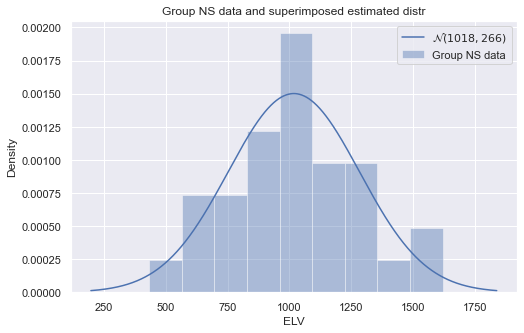

In [97]:
mu_est = data_NS.mean()   # obtained from sample mean
sigma_est = data_NS.std() # obtained from sample standard deviation
model_NS = norm(mu_est, sigma_est)

ax = sns.distplot(data_NS, bins=9, norm_hist=True, kde=False, label="Group NS data", color=blue)
ax.set(xlabel='ELV', ylabel='Density')
x = np.linspace(model_NS.ppf(0.001), model_NS.ppf(0.999), 10000)
y = model_NS.pdf(x)
label = '$\mathcal{N}(' + str(round(mu_est)) + ',' + str(round(sigma_est)) + ')$'
ax = sns.lineplot(x, y, ax=ax, label=label, color=blue)
_ = ax.set_title('Group NS data and superimposed estimated distr')


In other words, we don't need to do the "eyeball guessing" procedure in practice,
we can simply use functions for computing population parameter estimates.
More on that in the next notebook (see section Estimators).

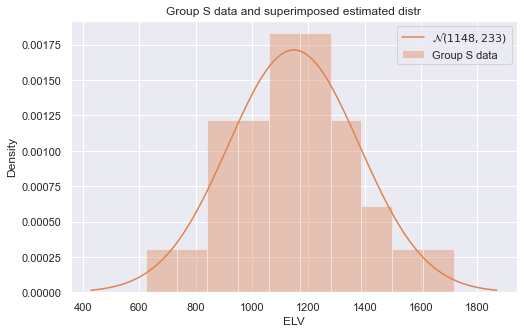

In [98]:
# load ELV data for Group S
data_S = df[df["group"]=="S"]['ELV']

# Estimate the population parameters for Group S data
mu_est = data_S.mean()   # obtained from sample mean
sigma_est = data_S.std() # obtained from sample standard deviation
model_S = norm(mu_est, sigma_est)

ax = sns.distplot(data_S, bins=10, norm_hist=True, kde=False, label="Group S data", color=orange)
ax.set(xlabel='ELV', ylabel='Density')
x = np.linspace(model_S.ppf(0.001), model_S.ppf(0.999), 10000)
y = model_S.pdf(x)
label = '$\mathcal{N}(' + str(round(mu_est)) + ',' + str(round(sigma_est)) + ')$'
ax = sns.lineplot(x, y, ax=ax, label=label, color=orange)
_ = ax.set_title('Group S data and superimposed estimated distr')

### Plot the probability models for the two groups

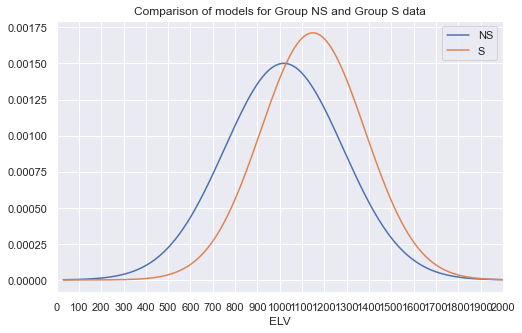

In [99]:
x = np.linspace(model_NS.ppf(0.0001), model_S.ppf(0.9999), 10000)
yNS = model_NS.pdf(x)
yS = model_S.pdf(x)

# plot the probability distributions for the two models
fig, ax = plt.subplots()
sns.lineplot(x, yNS, ax=ax, label="NS")
sns.lineplot(x, yS, ax=ax, label="S")
ax.set_title('Comparison of models for Group NS and Group S data')
ax.set_xlim(100,2000)
plt.xticks(np.arange(0,2100,100))
_ = ax.set_xlabel('ELV')

The above figure shows a more detailed view of the difference between the two groups.

Previously we computed the difference betweeen sample means `d` = 130, but now we see a more complete picture: we're comparing two probability distributions, which take into account the variability in the data.

### Median


The median of the distribution is 1000.0


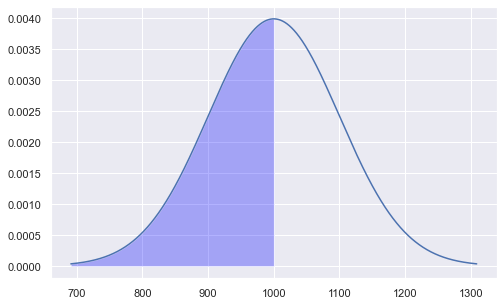

In [74]:
print("The median of the distribution is", rv.ppf(0.5))

# highlight the lower half of the distribution
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
mask50 = x < rv.ppf(0.5)
_ = ax.fill_between(x[mask50], y1=y[mask50], alpha=0.3, facecolor='blue')

### First and third quartiles

25% of the values of X are smaller than 932.5510249803918 (darker shaded region)
75% of the values of X are smaller than 1067.4489750196083 (lightly shaded region)


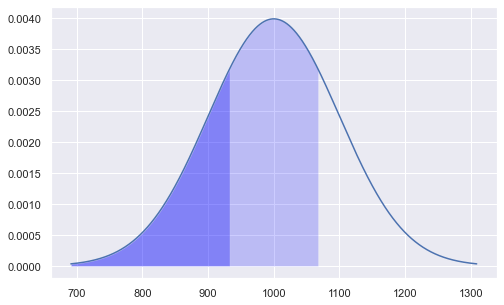

In [75]:
print("25% of the values of X are smaller than", rv.ppf(0.25), "(darker shaded region)")
print("75% of the values of X are smaller than", rv.ppf(0.75), "(lightly shaded region)")

# highlight the lower 25% and lower 75% of the distribution
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
mask25 = x < rv.ppf(0.25)
ax.fill_between(x[mask25], y1=y[mask25], alpha=0.3, facecolor='blue')
mask75 = x < rv.ppf(0.75)
_ = ax.fill_between(x[mask75], y1=y[mask75], alpha=0.2, facecolor='blue')

In [1]:
# plot the cumulative probability function (CDF) of the random variable rv
FX = rv.cdf(x)
title = 'Cumulative density function $F_X$ for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
_ = sns.lineplot(x, FX).set_title(title)

NameError: name 'rv' is not defined

## Lead out

We learned about probability models and how given parameters produce different shapes of distributions. Now we can now learn the statistical analysis procedures which are **principled way to compute estimates and make predictions**.

Next steps:

- Recall the two samples of ELV data that Amy has collected for the two groups
- We can use the data to infer the properties of the two populations $\mu_S$ and $\mu_{NS}$
- We're interested in the difference in population means $\Delta = \mu_S - \mu_{NS}$
  and we have two specific questions:
  1. Is there a difference (is $\Delta=0$ or $\Delta \neq 0$) ?
  2. How big is the difference $\Delta$?

In the next notebook, [03_STATS.ipynb](./03_STATS.ipynb), we'll learn the statistical inference techniques that will enable us to answer these questions.